<a href="https://colab.research.google.com/github/austainodedon/Deep-Learning-/blob/master/PRJMAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns


Using TensorFlow backend.


In [0]:
from google.colab import files
uploaded = files.upload()

Saving MYDATA.csv to MYDATA (1).csv


In [0]:
import io

df = pd.read_csv(io.StringIO(uploaded['MYDATA.csv'].decode('utf-8')))
df

,Superficial velocity Gas,Superficial Velocity Liquid,Flow Pattern
0,0.10,0.010,STRATIFIED
1,0.10,0.010,STRATIFIED
2,0.20,0.020,STRATIFIED
3,0.30,0.030,STRATIFIED
4,0.40,0.040,STRATIFIED
5,0.50,0.050,STRATIFIED
6,0.60,0.060,STRATIFIED
7,0.70,0.070,STRATIFIED
8,0.80,0.080,STRATIFIED
9,0.80,0.100,STRATIFIED


In [0]:
df["Flow Pattern"].value_counts()

STRATIFIED    20
BUBBLE        20
WAVE          20
SLUG          20
ANNULAR       20
DISPERSED     20
Name: Flow Pattern, dtype: int64

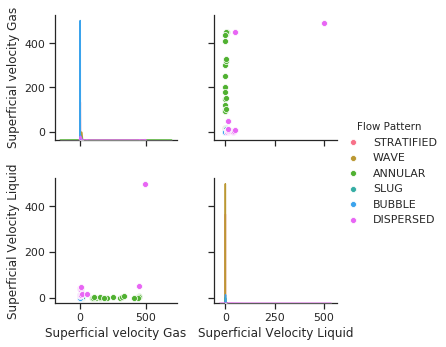

In [0]:
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(df.iloc[:,0:6], hue="Flow Pattern")

In [0]:
#Splitting the data into training and test
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [0]:
#X
#y
#y1
#Y
len(X_test)

24

In [42]:
model = Sequential()

model.add(Dense(2,input_shape=(2,),activation='relu'))
#model.add(Dense(8,activation='tanh'))
#model.add(Dense(6,activation='tanh'))
model.add(Dense(6,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 18        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


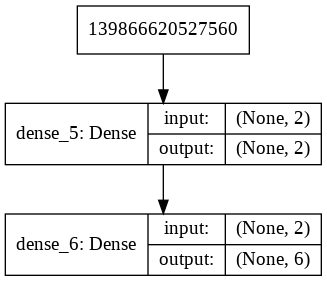

In [43]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(filename='model_plot.png')

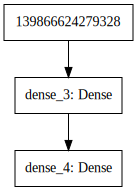

In [35]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [44]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
96/96 [==============================] - 0s 2ms/step - loss: 3.9553 - acc: 0.1146
Epoch 2/100
96/96 [==============================] - 0s 66us/step - loss: 3.4660 - acc: 0.0938
Epoch 3/100
96/96 [==============================] - 0s 199us/step - loss: 3.0788 - acc: 0.1562
Epoch 4/100
96/96 [==============================] - 0s 65us/step - loss: 2.6078 - acc: 0.1667
Epoch 5/100
96/96 [==============================] - 0s 47us/step - loss: 2.1501 - acc: 0.1562
Epoch 6/100
96/96 [==============================] - 0s 45us/step - loss: 1.8551 - acc: 0.1771
Epoch 7/100
96/96 [==============================] - 0s 44us/step - loss: 1.7198 - acc: 0.2500
Epoch 8/100
96/96 [==============================] - 0s 44us/step - loss: 1.6984 - acc: 0.2708
Epoch 9/100
96/96 [==============================] - 0s 43us/step - loss: 1.6938 - acc: 0.2708
Epoch 10/100
96/96 [==============================] - 0s 46us/step - loss: 1.6892 - acc: 0.2708
Epoch 11/100
96/96 [=============================

In [0]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [38]:
y_pred
#y_test_class

array([[5.0570148e-01, 3.7534032e-03, 6.5508255e-05, 3.7884538e-03,
        4.6561662e-02, 4.4012937e-01],
       [1.6590995e-10, 4.4064906e-01, 2.9770454e-02, 4.8163217e-01,
        4.7946744e-02, 1.4733923e-06],
       [9.4889874e-10, 4.3519461e-01, 2.6888650e-02, 4.7317615e-01,
        6.4735979e-02, 4.5815614e-06],
       [2.0278890e-03, 2.1977052e-01, 6.2476099e-03, 2.2828230e-01,
        4.9450833e-01, 4.9163334e-02],
       [1.9798124e-10, 4.4020119e-01, 2.9472467e-02, 4.8088676e-01,
        4.9437959e-02, 1.6530489e-06],
       [3.6679894e-01, 1.0481295e-02, 1.9591705e-04, 1.0621946e-02,
        1.0227933e-01, 5.0962251e-01],
       [2.2117302e-03, 2.1712737e-01, 6.1414982e-03, 2.2547005e-01,
        4.9723753e-01, 5.1811893e-02],
       [2.7331305e-03, 2.1056220e-01, 5.8828061e-03, 2.1849403e-01,
        5.0346583e-01, 5.8862031e-02],
       [5.0570148e-01, 3.7534032e-03, 6.5508255e-05, 3.7884538e-03,
        4.6561662e-02, 4.4012937e-01],
       [5.3498632e-09, 4.2712700e-01,

In [39]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         4
           2       1.00      1.00      1.00         2
           3       0.43      0.75      0.55         4
           4       0.83      1.00      0.91         5
           5       1.00      0.75      0.86         4

   micro avg       0.75      0.75      0.75        24
   macro avg       0.68      0.75      0.70        24
weighted avg       0.67      0.75      0.70        24

[[5 0 0 0 0 0]
 [0 0 0 4 0 0]
 [0 0 2 0 0 0]
 [0 0 0 3 1 0]
 [0 0 0 0 5 0]
 [1 0 0 0 0 3]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
X_test2 = np.array([[400, 0.1],[5,2.5],[8,3.5],[8,3.5],[8,3.5],[10,40]])#STRATIFIED, WAVE, ANNULAR, SLUG, BUBBLE, DISPERSED
y_pred2 = model.predict(X_test2)
y_pred2

array([[5.0570148e-01, 3.7534032e-03, 6.5508255e-05, 3.7884538e-03,
        4.6561662e-02, 4.4012937e-01],
       [1.5024637e-20, 4.1815114e-01, 9.1376208e-02, 4.8972437e-01,
        7.4826455e-04, 3.9992318e-13],
       [2.3566143e-27, 3.6914778e-01, 1.7788614e-01, 4.5292464e-01,
        4.1507992e-05, 1.3791933e-17],
       [2.3566143e-27, 3.6914778e-01, 1.7788614e-01, 4.5292464e-01,
        4.1507992e-05, 1.3791933e-17],
       [2.3566143e-27, 3.6914778e-01, 1.7788608e-01, 4.5292464e-01,
        4.1508032e-05, 1.3791986e-17],
       [0.0000000e+00, 7.2840802e-15, 1.0000000e+00, 6.3340033e-14,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [41]:
print(np.argmax(y_pred2,axis=1))#0 = STRATIFIED 1 = WAVE 2 = ANNULAR 3 = SLUG 4 = BUBBLE 5 = DISPERSED

[0 3 3 3 3 2]
